# python 3 or 2.7?????

In [45]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [46]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [47]:
!which R

/usr/bin/R


In [48]:
import os


In [49]:
import Nio
import glob

In [50]:
!pwd


/home/clepore/SubX_usecase


In [51]:
ds_merged_allM=xr.open_dataset('ds_merged_NASA_allM.nc')

In [52]:
ds_merged=xr.open_dataset('ds_merged_NASA.nc')
ds_merged_mean=xr.open_dataset('ds_merged_mean_NASA.nc')

In [53]:
ds_merged

<xarray.Dataset>
Dimensions:   (T: 324, lat: 11, lon: 14)
Coordinates:
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat       (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * T         (T) datetime64[ns] 1999-06-06T12:00:00 ... 2016-08-30T12:00:00
Data variables:
    apcp      (T, lat, lon) float32 ...
    pr        (T, lat, lon) float32 ...
    cape      (T, lat, lon) float32 ...
    tas       (T, lat, lon) float32 ...
    tdps      (T, lat, lon) float32 ...
    apcp_rep  (T, lat, lon) float32 ...

In [54]:
df_merged = ds_merged[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged = df_merged.reset_index()
df_merged.index.names = ['orig_rows']
df_merged.reset_index(inplace=True)
df_merged.set_index('T', inplace=True)
df_merged.head(5)

,orig_rows,lat,lon,apcp_rep,pr,tas,tdps,cape
T,,,,,,,,
1999-06-06 12:00:00,0,32.0,257.0,0.055901,0.000007,300.762817,284.531342,553.927734
1999-06-06 12:00:00,1,32.0,258.0,0.360378,0.000013,300.747803,285.956390,610.276550
1999-06-06 12:00:00,2,32.0,259.0,1.060563,0.000006,301.608215,286.233826,464.578491
1999-06-06 12:00:00,3,32.0,260.0,0.688205,0.000003,301.999451,287.027435,390.460815
1999-06-06 12:00:00,4,32.0,261.0,0.667148,0.000006,301.130035,288.896301,402.764709


In [55]:
df_merged_mean = ds_merged_mean[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged_mean = df_merged_mean.reset_index()
df_merged_mean.index.names = ['orig_rows']
df_merged_mean.reset_index(inplace=True)
df_merged_mean.set_index('T', inplace=True)
df_merged_mean.head(5)

,orig_rows,apcp_rep,pr,tas,tdps,cape
T,,,,,,
1999-06-06 12:00:00,0,0.600626,0.000024,298.421387,290.088684,902.373779
1999-06-11 12:00:00,1,0.557247,0.000057,296.208313,290.304840,522.669067
1999-06-16 12:00:00,2,0.322619,0.000033,293.425323,287.069916,285.098480
1999-06-21 12:00:00,3,0.740199,0.000033,298.265991,291.960571,829.365540
1999-06-26 12:00:00,4,0.699419,0.000050,298.302246,291.988129,932.164368


In [56]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])


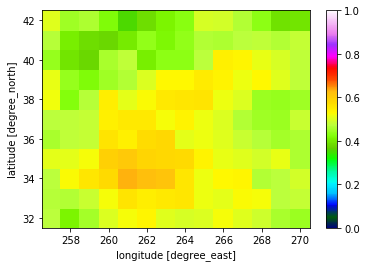

In [57]:
spearman_correlation(ds_merged.apcp_rep, ds_merged.pr*84600/8,'T').plot(vmin=0,vmax=1, cmap='gist_ncar')

# fix units

In [58]:
df_merged['pr']= df_merged['pr']*84600/8  # 3 hourly and not daily
df_merged[0:17500].tail(5)

,orig_rows,lat,lon,apcp_rep,pr,tas,tdps,cape
T,,,,,,,,
2005-07-01 12:00:00,17495,38.0,266.0,0.615346,0.860776,298.346588,293.506866,1355.872559
2005-07-01 12:00:00,17496,38.0,267.0,0.354381,1.291368,299.305542,291.713257,1029.968262
2005-07-01 12:00:00,17497,38.0,268.0,0.222734,1.042061,299.257233,290.687866,823.182678
2005-07-01 12:00:00,17498,38.0,269.0,0.267536,0.475859,299.396790,290.244202,762.203247
2005-07-01 12:00:00,17499,38.0,270.0,0.462263,0.242472,299.681641,291.266174,729.746094


In [59]:
df_merged_mean['pr']= df_merged_mean['pr']*84600/8  # 3 hourly and not daily
df_merged_mean.head(5)

,orig_rows,apcp_rep,pr,tas,tdps,cape
T,,,,,,
1999-06-06 12:00:00,0,0.600626,0.253011,298.421387,290.088684,902.373779
1999-06-11 12:00:00,1,0.557247,0.598651,296.208313,290.304840,522.669067
1999-06-16 12:00:00,2,0.322619,0.348074,293.425323,287.069916,285.098480
1999-06-21 12:00:00,3,0.740199,0.352436,298.265991,291.960571,829.365540
1999-06-26 12:00:00,4,0.699419,0.526403,298.302246,291.988129,932.164368


In [60]:
#thisis not normalized
df_merged['y']=df_merged.apcp_rep*1.
df_merged_mean['y']=df_merged_mean.apcp_rep*1.


In [61]:
df_merged['logpr'] = np.log(df_merged['pr'])
df_merged_mean['logpr'] = np.log(df_merged_mean['pr'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

df_merged['logcape'] = np.log(df_merged['cape'])
df_merged_mean['logcape'] = np.log(df_merged_mean['cape'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()
df_merged['logtas'] = np.log(df_merged['tas'])
df_merged_mean['logtas'] = np.log(df_merged_mean['tas'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()
df_merged['logtdps'] = np.log(df_merged['tdps'])
df_merged_mean['logtdps'] = np.log(df_merged_mean['tdps'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

In [62]:
df_merged_mean.describe()

,orig_rows,apcp_rep,pr,tas,tdps,cape,y,logpr,logcape,logtas,logtdps
count,324.00000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,161.50000,0.360848,0.241608,300.062103,289.589294,520.831482,0.360848,-1.717430,6.121157,5.703958,5.668442
std,93.67497,0.187529,0.168141,2.369417,1.817986,250.449310,0.187529,0.873822,0.558968,0.007896,0.006285
min,0.00000,0.016476,0.005736,293.425323,284.094177,47.427742,0.016476,-5.160945,3.859207,5.681623,5.649306
25%,80.75000,0.225871,0.119048,298.300362,288.436035,352.397018,0.225871,-2.128341,5.864755,5.698101,5.664474
50%,161.50000,0.334118,0.204191,300.178696,289.731522,489.844727,0.334118,-1.588702,6.194053,5.704378,5.668955
75%,242.25000,0.455885,0.335091,301.628326,290.839188,675.343384,0.455885,-1.093360,6.515212,5.709195,5.672770
max,323.00000,1.019700,0.889376,306.238495,293.587677,1457.594238,1.019700,-0.117235,7.284543,5.724364,5.682176


In [64]:
Xall = df_merged[['orig_rows','apcp_rep','pr','tas','tdps','cape','logpr','logcape','logtas','logtdps']]
yall = df_merged.loc[:, df_merged.columns == 'y']
Xall['const']=1

Xm = df_merged_mean[['orig_rows','apcp_rep','pr','tas','tdps','cape','logpr','logcape','logtas','logtdps']]
ym = df_merged_mean.loc[:, df_merged_mean.columns == 'y']
Xm['const']=1

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
def random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
        
    AA = ((REAL-PREDICTION_A.values)**2)**(1/2.)
    BB = ((REAL-PREDICTION_B.values)**2)**(1/2.)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1.3, 1))
#     plt.yscale('symlog')

In [83]:
# def random_walk_mike_map(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel,ax):
#     if len(y_trainT.shape)==2:
#         REAL = REAL.values[:,0]
#     elif len(y_trainT.shape)==1:
#         REAL = REAL.values[:]
#     df_temp = TIMEINDEX
#     df_temp['REAL']= REAL
#     df_temp['PA'] = PREDICTION_A.values
#     df_temp['PB'] = PREDICTION_B.values
#     print(df_temp.head(10))
#     AA=np.zeros((pd.unique(df_temp['T']).shape))
#     BB=np.zeros((pd.unique(df_temp['T']).shape))
#     for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
#         AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
#         BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
#     better_AA = AA<BB
#     better_AA = better_AA.astype(int)
#     better_AA[better_AA==0]=-1
#     ax.plot(np.cumsum(better_AA), label=secondmodel)
#     ax.set_title(firstmodel)
#     ax.legend( bbox_to_anchor=(1.1, 1))
#     #     plt.yscale('symlog')
def random_walk_mike_map(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel,ax,colorplot,legendflag=0):
#     if len(y_trainT.shape)==2:
#         REAL = REAL.values[:,0]
#     elif len(y_trainT.shape)==1:
#         REAL = REAL.values[:]
#     df_temp = TIMEINDEX
    df_temp= REAL.to_frame('REAL')
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    AA=np.zeros((pd.unique(df_temp.index).shape))
    BB=np.zeros((pd.unique(df_temp.index).shape))
    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    ax.plot(np.cumsum(better_AA), label=secondmodel, color=colorplot)
    ax.set_title(firstmodel)
    if legendflag==1:
        ax.legend( bbox_to_anchor=(1.1, 0.5), loc='center left')
    return np.cumsum(better_AA)[-1]
#     plt.yscale('symlog')

In [68]:
# def random_walk_mike_map_BSS(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,CLIMO,firstmodel,secondmodel,ax):
#     if len(y_trainT.shape)==2:
#         REAL = REAL.values[:,0]
#     elif len(y_trainT.shape)==1:
#         REAL = REAL.values[:]
#     df_temp = TIMEINDEX
#     df_temp['REAL']= REAL
#     df_temp['PA'] = PREDICTION_A.values
#     df_temp['PB'] = PREDICTION_B.values
#     df_temp['CL'] = CLIMO.values
#     print(df_temp.head(10))
#     AA=np.zeros((pd.unique(df_temp['T']).shape))
#     BB=np.zeros((pd.unique(df_temp['T']).shape))
#     CC=np.zeros((pd.unique(df_temp['T']).shape))

#     for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
#         AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
#         BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
#         CC[ik] = np.sum((gp.REAL.values-gp.CL.values)**2)
#     AA = 1.-AA/CC
#     BB = 1.-BB/CC
    
#     better_AA = AA>BB
#     better_AA = better_AA.astype(int)
#     better_AA[better_AA==0]=-1
#     ax.plot(np.cumsum(better_AA), label=secondmodel)
#     ax.set_title(firstmodel)
#     ax.legend( bbox_to_anchor=(1.1, 1))
#     #     plt.yscale('symlog')

def random_walk_mike_map_BSS(REAL, PREDICTION_A, PREDICTION_B,CLIMO,firstmodel,secondmodel,ax,colorplot,legendflag=0):
#     if len(y_trainT.shape)==2:
#         REAL = REAL.values[:,0]
#     elif len(y_trainT.shape)==1:
#         REAL = REAL.values[:]
#     df_temp = TIMEINDEX
    df_temp= REAL.to_frame('REAL')
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    df_temp['CL'] = CLIMO.values
    AA=np.zeros((pd.unique(df_temp.index).shape))
    BB=np.zeros((pd.unique(df_temp.index).shape))
    CC=np.zeros((pd.unique(df_temp.index).shape))

    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
        CC[ik] = np.sum((gp.REAL.values-gp.CL.values)**2)
    AA = 1.-AA/CC
    BB = 1.-BB/CC
    
    better_AA = AA>BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    ax.plot(np.cumsum(better_AA), label=secondmodel, color=colorplot)
    ax.set_title(firstmodel)
    if legendflag==1:
        ax.legend( bbox_to_anchor=(1.1, 1))
    #     plt.yscale('symlog')

In [69]:
def missing_elements(L,start,end):
#     start, end = L[0], L[-1]
    return sorted(set(range(start, end + 1)).difference(L))


In [85]:
Xall

,orig_rows,apcp_rep,pr,tas,tdps,cape,logpr,logcape,logtas,logtdps,const
T,,,,,,,,,,,
1999-06-06 12:00:00,0,0.055901,0.078508,300.762817,284.531342,553.927734,-2.544561,6.317034,5.706322,5.650844,1
1999-06-06 12:00:00,1,0.360378,0.133952,300.747803,285.956390,610.276550,-2.010275,6.413912,5.706272,5.655839,1
1999-06-06 12:00:00,2,1.060563,0.065657,301.608215,286.233826,464.578491,-2.723306,6.141130,5.709129,5.656809,1
1999-06-06 12:00:00,3,0.688205,0.033474,301.999451,287.027435,390.460815,-3.396973,5.967328,5.710425,5.659578,1
1999-06-06 12:00:00,4,0.667148,0.062651,301.130035,288.896301,402.764709,-2.770169,5.998353,5.707542,5.666068,1
1999-06-06 12:00:00,5,0.364467,0.042096,301.659027,289.774109,411.826508,-3.167806,6.020602,5.709297,5.669102,1
1999-06-06 12:00:00,6,0.207968,0.031958,301.484619,291.110046,451.260376,-3.443322,6.112044,5.708719,5.673701,1
1999-06-06 12:00:00,7,0.313630,0.048190,301.135223,291.946014,482.019043,-3.032602,6.177984,5.707560,5.676569,1
1999-06-06 12:00:00,8,0.395631,0.093751,299.464874,292.677795,567.514404,-2.367117,6.341266,5.701997,5.679072,1


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

AUC  0.9318685748840959
['const', 'logpr', 'logcape', 'logtdps']
AF  0.0
[]
F  -34.0
['const', 'logpr', 'logtas', 'logtdps']
AUC  0.9243795620437957
['const', 'logpr', 'logcape', 'logtdps']
AF  0.0
[]
F  -78.0
['const', 'logpr', 'logcape', 'logtdps']
AUC  0.8997821350762527
['const', 'logpr']
AF  0.0
[]
F  0.0
[]


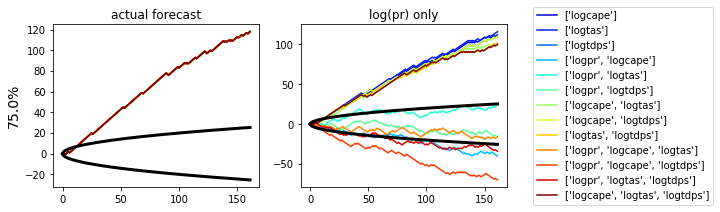

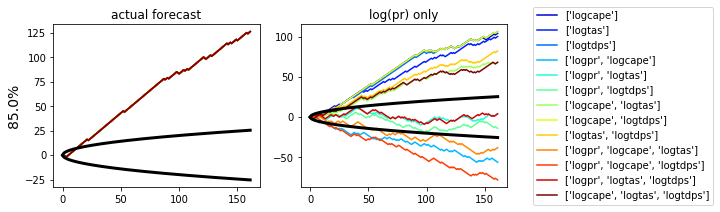

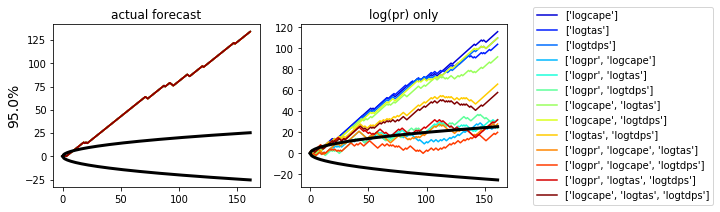

In [101]:
MEDIA = 1

if MEDIA ==1:
    X = Xm*1.
    y = ym*1.
else:
    X = Xall*1.
    y = yall*1.

threshold_perc_list = [0.75,0.85,0.95]


from itertools import combinations
import random

# set threshold percentile
# threshold_perc = 0.85

# set randomness . 1 for random, 0 for split time series
randpick=-1
import random

if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    
    picktrain = random.sample(range(X.shape[0]), int(X.shape[0]/2))
    picktrain = np.sort(picktrain)
    picktest = missing_elements(picktrain,0,int(X.shape[0])-1)
    X_trainT = X.iloc[picktrain]
    X_testT = X.iloc[picktest]
    y_trainT = y.iloc[picktrain]
    y_testT = y.iloc[picktest]                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)
elif randpick==-1:
    X_trainT = X[int(X.shape[0]/2):]
    y_trainT = y[int(X.shape[0]/2):].astype(int)
    X_testT = X[0:int(X.shape[0]/2)]
    y_testT = y[0:int(X.shape[0]/2)].astype(int)

for it,threshold_perc in enumerate(threshold_perc_list):
    # calculate occurrence and non occurence based on insample quantile so no leaking.
    y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
    y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
    actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)


    # calculate climatology I start by copying the values as they are
    X_trainT['climo_precip'] = y_trainT*1.#X_trainT.apcp_rep*1.
    X_testT['climo_precip'] = y_testT*1.#X_testT.apcp_rep*1.
    # now substitute values per each month
    # GT = X_trainT.groupby(pd.Grouper(freq='M'))
    GT = X_trainT.groupby(X_trainT.index.month)
    X_trainT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)

    # GT = X_testT.groupby(pd.Grouper(freq='M'))
    GT = X_testT.groupby(X_testT.index.month)
    X_testT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)


    if MEDIA ==1:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean(dim=['M','lat','lon']).compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean(dim=['M','lat','lon']).compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
    else:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']

    if randpick==1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==0:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==-1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]

    REAL = y_testT
    # Generate empty dataframe to put the reference values which I will use for the randomwalk plots
    # this needs to be the TEST segment of the data

    Prediction_test_rw = X_testT[['ens_freq']]*1.
    Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
    Prediction_test_rw['actual_forecast'] = actual_forecast*1
    plt.figure(figsize=(17,3))
    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
#     ax4 = plt.subplot(1,4,4)

    # all combinations of all models
    v1 = ['const']
    # varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
    # varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
    varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
    l1 = list(combinations(varnamesall,1))
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = l1+l2+l3
    ROCAUC = 0.
    ROCAUCpar = list()
    list_ef = 0.
    list_efpar = list()
    list_c = 0.
    list_cpar = list()
    list_af = 0.
    list_afpar = list()
    list_f = 0.
    list_fpar = list()
    colors_lines = plt.cm.jet(np.linspace(0,1,len(lall)))

    flagpr=0
    for ic,iname in enumerate(lall):
#         print(iname)
        v2=v1+list(iname)
        X_train = X_trainT[v2]
        X_test = X_testT[v2]
        logit_model=sm.Logit(y_trainT,X_train)
    #     model = LogisticRegression(C=1e8)
        if (iname!=('logpr','pr'))&(iname!=('logcape','cape'))&(iname!=('logtas','tas')):
            try:
                result1=logit_model.fit(disp=0,maxiter=100)
                predictions = result1.predict(X_test)
                ROCAUC1 = roc_auc_score(y_testT[np.isfinite(predictions.values)], predictions.values[np.isfinite(predictions.values)])
        #         print(predictions.values[np.isfinite(predictions.values)==0])
        #         print(ROCAUC1)
                if ROCAUC1>ROCAUC:
                    ROCAUC=ROCAUC1*1.
                    ROCAUCpar = list(v2)

                PREDICTION_B = predictions*1.
    #             random_walk_mike_map_BSS(REAL, Prediction_test_rw['ens_freq'], 
    #                                      PREDICTION_B ,X_testT['climo_precip'],'ensemble freq.',v2[1:], ax1,colors_lines[ic])
    #             random_walk_mike_map_BSS(REAL, Prediction_test_rw['climo_only'], 
    #                                      PREDICTION_B ,X_testT['climo_precip'],'climatology',v2[1:], ax2,colors_lines[ic])
#                 list_ef1 = random_walk_mike_map(REAL, Prediction_test_rw['ens_freq'], 
#                                          PREDICTION_B ,'ensemble freq.',v2[1:], ax1,colors_lines[ic])
#                 list_c1 = random_walk_mike_map(REAL, Prediction_test_rw['climo_only'], 
#                                          PREDICTION_B ,'climatology',v2[1:], ax2,colors_lines[ic])
                list_af1 = random_walk_mike_map(REAL, Prediction_test_rw['actual_forecast'], 
                                         PREDICTION_B ,'actual forecast',v2[1:], ax1,colors_lines[ic], 
                                         legendflag=0)
                ax1.set_ylabel(str(threshold_perc*100)+'%', fontsize=14)
#                 if (list_ef1<0)&(list_ef1<=list_ef):
#                     list_ef=list_ef1*1.
#                     list_efpar = list(v2)
#                 if (list_c1<0)&(list_c1<=list_c):
#                     list_c=list_c1*1.
#                     list_cpar = list(v2)
                if (list_af1)<0&(list_af1<=list_af):
                    list_af=list_af1*1.
                    list_afpar = list(v2)

                if iname==('logpr',):
        #             print('PROVA')
                    Prediction_test_rw['logpr_only'] = predictions*1.
#                     ax3 = plt.subplot(1,4,3)
    #             elif iname==('pr',):
    #     #             print('PROVA')
    #                 Prediction_test_rw['pr_only'] = predictions*1.
    #                 ax4 = plt.subplot(1,4,4)



                if iname!=('logpr',):
                    PREDICTION_B = predictions*1.
    #                 random_walk_mike_map_BSS(REAL, Prediction_test_rw['logpr_only'], 
    #                                          PREDICTION_B ,X_testT['climo_precip'],'log(pr) only 75%',v2[1:], ax3,colors_lines[ic], legendflag=1)
                    list_f1=random_walk_mike_map(REAL, Prediction_test_rw['logpr_only'], 
                                             PREDICTION_B,'log(pr) only',v2[1:], 
                                                 ax2,colors_lines[ic], 
                                         legendflag=1)
                    if (list_f1)<0&(list_f1<=list_f):
                        list_f=list_f1*1.
                        list_fpar = list(v2)
   #             if iname!=('pr',):

    #                 if flagpr==0:
    #                     PREDICTION_B = Prediction_test_rw['logpr_only']*1.
    #                     random_walk_mike_map(REAL, Prediction_test_rw['pr_only'], 
    #                                              PREDICTION_B ,'pr only',['logpr'], ax4,colors_lines[0], legendflag=1)
    #                     flagpr=1
    #                 elif flagpr==1:
    #                     PREDICTION_B = predictions*1.
    #                     random_walk_mike_map(REAL, Prediction_test_rw['pr_only'], 
    #                                              PREDICTION_B ,'pr only',v2[1:], ax4,colors_lines[ic], legendflag=1)

            except:
                print('error')
    print('AUC ',ROCAUC)
    print(ROCAUCpar)
#     print('EF ',list_ef)
#     print(list_efpar)
#     print('C ',list_c)
#     print(list_cpar)
    print('AF ',list_af)
    print(list_afpar)
    print('F ',list_f)
    print(list_fpar)
    NN = len(pd.unique(X_testT.index))
    for ax in (ax1,ax2):#, ax3, ax4):
        ax.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
        ax.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th





EF  0.0
F  -36.0
['const', 'logpr', 'logcape', 'logtdps']




EF  0.0
F  -64.0
['const', 'logpr', 'cape', 'tdps']




EF  0.0
F  -86.0
['const', 'logpr', 'cape', 'tdps']


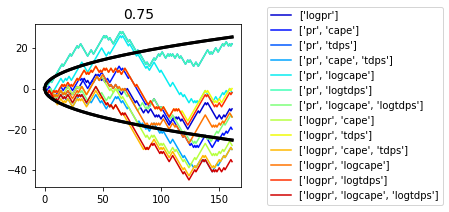

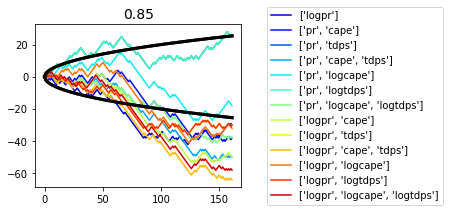

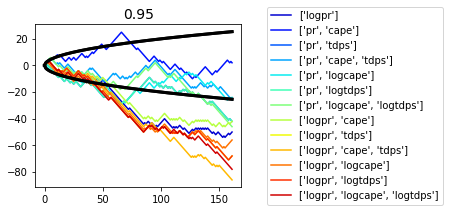

In [103]:
# CASO UTILIZZATO IN PROPOSAL
MEDIA = 1

if MEDIA ==1:
    X = Xm*1.
    y = ym*1.
else:
    X = Xall*1.
    y = yall*1.

threshold_perc_list = [0.75,0.85,0.95]


from itertools import combinations
import random

# set randomness . 1 for random, 0 for split time series
randpick=0
import random

if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    
#     picktrain = random.sample(range(X.shape[0]), int(X.shape[0]/2))
#     picktrain = np.sort(picktrain)
#     picktest = missing_elements(picktrain,0,int(X.shape[0])-1)
    X_trainT = X.iloc[picktrain]
    X_testT = X.iloc[picktest]
    y_trainT = y.iloc[picktrain]
    y_testT = y.iloc[picktest]                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)
elif randpick==-1:
    X_trainT = X[int(X.shape[0]/2):]
    y_trainT = y[int(X.shape[0]/2):].astype(int)
    X_testT = X[0:int(X.shape[0]/2)]
    y_testT = y[0:int(X.shape[0]/2)].astype(int)

for it,threshold_perc in enumerate(threshold_perc_list):
    # calculate occurrence and non occurence based on insample quantile so no leaking.
    y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
    y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
    actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)

    # calculate climatology I start by copying the values as they are
    X_trainT['climo_precip'] = y_trainT*1.#X_trainT.apcp_rep*1.
    X_testT['climo_precip'] = y_testT*1.#X_testT.apcp_rep*1.
    # now substitute values per each month
    # GT = X_trainT.groupby(pd.Grouper(freq='M'))
    GT = X_trainT.groupby(X_trainT.index.month)
    X_trainT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)

    # GT = X_testT.groupby(pd.Grouper(freq='M'))
    GT = X_testT.groupby(X_testT.index.month)
    X_testT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)


    if MEDIA ==1:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
        ds_merged_allMm = ds_merged_allM.mean(dim=['lat','lon'])
        ds_merged_M01 = (ds_merged_allMm.pr>X_trainT.quantile(threshold_perc).pr).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
    else:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']

    if randpick==1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==0:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==-1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]

    REAL = y_testT
    # Generate empty dataframe to put the reference values which I will use for the randomwalk plots
    # this needs to be the TEST segment of the data

    Prediction_test_rw = X_testT[['ens_freq']]*1.
    Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
    Prediction_test_rw['actual_forecast'] = actual_forecast*1
    plt.figure(figsize=(17,3))
    ax1 = plt.subplot(1,4,1)
#     ax2 = plt.subplot(1,4,2)
#     ax3 = plt.subplot(1,4,3)

    # all combinations of all models
    v1 = ['const']
    # varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
    # varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
    
#     varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
#     l1 = list(combinations(varnamesall,1))
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = l1+l2+l3
    #####################
    varnamesall = ['pr']
    la = list(combinations(varnamesall,1))
    varnamesall = ['logpr']
    lb = list(combinations(varnamesall,1))
    varnamesall = ['pr', 'cape',  'tdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = la+lb+l2+l3#+lall
    varnamesall = ['pr', 'logcape',  'logtdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    varnamesall = ['logpr','cape', 'tdps'] 
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    varnamesall = ['logpr', 'logcape', 'logtdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    counterlall = 1
    for ic,iname in enumerate(lall):
        if (iname[0]!='pr')&(iname[0]!='logpr'):
            counterlall+=0
        else:
            counterlall+=1
            
    list_ef = 0.
    list_efpar = list()
    list_c = 0.
    list_cpar = list()
    list_af = 0.
    list_afpar = list()
    list_f = 0.
    list_fpar = list()
    colors_lines = plt.cm.jet(np.linspace(0,1,counterlall))

    flagpr=0
    counterlall=1
    for ic,iname in enumerate(lall):
        if (iname[0]!='pr')&(iname[0]!='logpr'):
            print('',)
        else:
            v2=v1+list(iname)
            X_train = X_trainT[v2]
            X_test = X_testT[v2]
            logit_model=sm.Logit(y_trainT,X_train)
            result1=logit_model.fit(disp=0,maxiter=100)
            predictions = result1.predict(X_test)
            PREDICTION_B = predictions*1.
#             list_ef1 = random_walk_mike_map(REAL, Prediction_test_rw['ens_freq'], 
#                                      PREDICTION_B ,'ensemble freq.',v2[1:], ax1,colors_lines[counterlall-1], 
#                                      legendflag=0)

#             list_af1 = random_walk_mike_map(REAL, Prediction_test_rw['actual_forecast'], 
#                                      PREDICTION_B ,'actual forecast',v2[1:], ax2,colors_lines[ic], 
#                                      legendflag=0)
#             ax1.set_ylabel(str(threshold_perc*100)+'%', fontsize=14)
#             if (list_ef1<0)&(list_ef1<=list_ef):
#                 list_ef=list_ef1*1.
#                 list_efpar = list(v2)
#             if (list_c1<0)&(list_c1<=list_c):
#                 list_c=list_c1*1.
#                 list_cpar = list(v2)
#             if (list_af1)<0&(list_af1<=list_af):
#                 list_af=list_af1*1.
#                 list_afpar = list(v2)


            if iname==('pr',):
    #             print('PROVA')
                Prediction_test_rw['pr_only'] = predictions*1.
            if iname!=('pr',):
                PREDICTION_B = predictions*1.
#                 random_walk_mike_map_BSS(REAL, Prediction_test_rw['logpr_only'], 
#                                          PREDICTION_B ,X_testT['climo_precip'],'log(pr) only 75%',v2[1:], ax3,colors_lines[ic], legendflag=1)
                list_f1=random_walk_mike_map(REAL, Prediction_test_rw['pr_only'], 
                                         PREDICTION_B,'pr only',v2[1:], 
                                             ax1,colors_lines[counterlall-1], 
                                     legendflag=1)
                if (list_f1<=list_f)&(list_f1<0):
                    list_f=list_f1*1.
                    list_fpar = list(v2)
            counterlall+=1

    print('EF ',list_ef)
#     print(list_efpar)
    print('F ',list_f)
    print(list_fpar)
    NN = len(pd.unique(X_testT.index))
    for ax in (ax1,ax1):#, ax3, ax4):
        ax.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
        ax.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
        ax.set_title(threshold_perc, fontsize=14)


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th





('logpr', 'logcape', 'logtdps')




('pr', 'logcape', 'logtdps')




('logpr',)


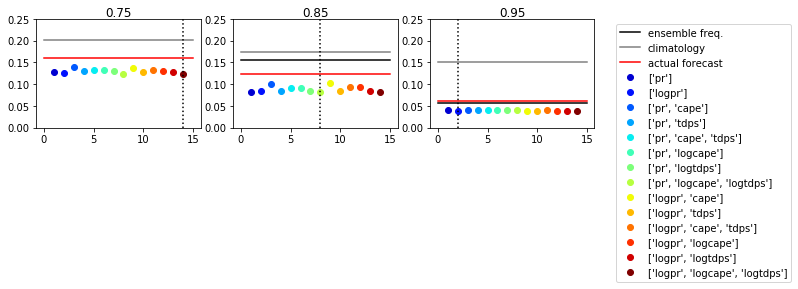

In [100]:
MEDIA = 1

if MEDIA ==1:
    X = Xm*1.
    y = ym*1.
else:
    X = Xall*1.
    y = yall*1.

from itertools import combinations
import random

# set threshold percentile
threshold_perc_list = [0.75,0.85,0.95]
symb_t = 'ox+'
linestyles = [ '-', '--', ':']
symb_t = 'ooo'
linestyles = [ '-', '-', '-']
# set randomness . 1 for random, 0 for split time series
randpick=0

import random
if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    
    picktrain = random.sample(range(X.shape[0]), int(X.shape[0]/2))
    picktrain = np.sort(picktrain)
    picktest = missing_elements(picktrain,0,int(X.shape[0])-1)
    X_trainT = X.iloc[picktrain]
    X_testT = X.iloc[picktest]
    y_trainT = y.iloc[picktrain]
    y_testT = y.iloc[picktest]                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)
elif randpick==-1:
    X_trainT = X[int(X.shape[0]/2):]
    y_trainT = y[int(X.shape[0]/2):].astype(int)
    X_testT = X[0:int(X.shape[0]/2)]
    y_testT = y[0:int(X.shape[0]/2)].astype(int)
    
plt.figure(figsize=(10,2))
for it,threshold_perc in enumerate(threshold_perc_list):
    ax = plt.subplot(1,3,it+1)

    # calculate occurrence and non occurence based on insample quantile so no leaking.
    y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
    y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
    actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)


    # calculate climatology I start by copying the values as they are
    X_trainT['climo_precip'] = y_trainT*1.#X_trainT.apcp_rep*1.
    X_testT['climo_precip'] = y_testT*1.#X_testT.apcp_rep*1.
    # now substitute values per each month
    # GT = X_trainT.groupby(pd.Grouper(freq='M'))
    GT = X_trainT.groupby(X_trainT.index.month)
    X_trainT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)

    # GT = X_testT.groupby(pd.Grouper(freq='M'))
    GT = X_testT.groupby(X_testT.index.month)
    X_testT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)


    if MEDIA ==1:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean(dim=['M','lat','lon']).compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean(dim=['M','lat','lon']).compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
    else:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']

    if randpick==1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==0:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==-1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]

    REAL = y_testT
    # Generate empty dataframe to put the reference values which I will use for the randomwalk plots
    # this needs to be the TEST segment of the data


    # all combinations of all models
    v1 = ['const']
    # varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
    # varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
#     varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
#     l1 = list(combinations(varnamesall,1))
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = l1+l2+l3
    #####################
#     varnamesall = ['pr', 'cape', 'tas', 'tdps']
#     l1 = list(combinations(varnamesall,1))
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = l1+l2+l3#+lall
#     varnamesall = ['pr', 'logcape', 'logtas', 'logtdps']
#     l1 = list(combinations(varnamesall,1))
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = lall+l1[1:]+l2+l3
#     varnamesall = ['logpr']
#     l1 = list(combinations(varnamesall,1))
#     varnamesall = ['logpr','cape', 'tas', 'tdps'] 
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = lall+l1+l2+l3
#     varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
#     l2 = list(combinations(varnamesall,2))
#     l3 = list(combinations(varnamesall,3))
#     lall = lall+l2+l3
    #####################
    varnamesall = ['pr']
    la = list(combinations(varnamesall,1))
    varnamesall = ['logpr']
    lb = list(combinations(varnamesall,1))
    varnamesall = ['pr', 'cape',  'tdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = la+lb+l2+l3#+lall
    varnamesall = ['pr', 'logcape',  'logtdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    varnamesall = ['logpr','cape', 'tdps'] 
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    varnamesall = ['logpr', 'logcape', 'logtdps']
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = lall+l2+l3
    counterlall = 1
    for ic,iname in enumerate(lall):
        if (iname[0]!='pr')&(iname[0]!='logpr'):
            counterlall+=0
        else:
            counterlall+=1
            
    
    ROCAUC = 1.
    ROCplace = 0.
    ROCplacecorretto = 0.
    ROCAUCpar = list()
    colors_lines = plt.cm.jet(np.linspace(0,1,counterlall))

    Prediction_test_rw = X_testT[['ens_freq']]*1.
    Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
    Prediction_test_rw['actual_forecast'] = actual_forecast*1

#     ROCAUC1 = np.nanmean((y_testT[np.isfinite(Prediction_test_rw['ens_freq'].values)]-
#                   Prediction_test_rw['ens_freq'].values[np.isfinite(Prediction_test_rw['ens_freq'].values)])**2)
    ROCAUC1 = np.nanmean((y_testT-
                  Prediction_test_rw['ens_freq'].values)**2)
    
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='black',label='ensemble freq.')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ax.set_title(threshold_perc,horizontalalignment='center',
           verticalalignment='center',)
    ROCAUC1 = np.nanmean((y_testT-
                          Prediction_test_rw['climo_only'].values)**2)
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='grey',label = 'climatology')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ROCAUC1 = np.nanmean((y_testT- 
                            Prediction_test_rw['actual_forecast'].values)**2)
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='red',label='actual forecast')

    flagpr=0
    counterlall = 1

    for ic,iname in enumerate(lall):
        if (iname[0]!='pr')&(iname[0]!='logpr'):
            print('',)
        else:
            v2=v1+list(iname)
            X_train = X_trainT[v2]
            X_test = X_testT[v2]
            logit_model=sm.Logit(y_trainT,X_train)
        #     model = LogisticRegression(C=1e8)
#             try:
            result1=logit_model.fit(disp=0,maxiter=100)
            predictions = result1.predict(X_test)
            ROCAUC1 = np.nanmean((y_testT-
                                  predictions.values)**2)
            ax.plot(counterlall,ROCAUC1,symb_t[it],color=colors_lines[counterlall],label=v2[1:])
#             print(ROCAUC1,ROCAUC)
            if ROCAUC1<ROCAUC:
                ROCAUC=ROCAUC1*1.
                ROCAUCpar = list(v2)
                ROCplace=ic
                ROCplacecorretto=counterlall
            counterlall+=1



#             except:
#                 print('error')
    if it==2:
        ax.legend( bbox_to_anchor=(1.1, 1), loc='upper left', ncol=1)
    ax.set_ylim((0,0.25))
#     ax.set_xlim((-1.5,15))
    ax.plot([ROCplacecorretto,ROCplacecorretto],[0,0.25],'k:')
    print(lall[ROCplace])

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

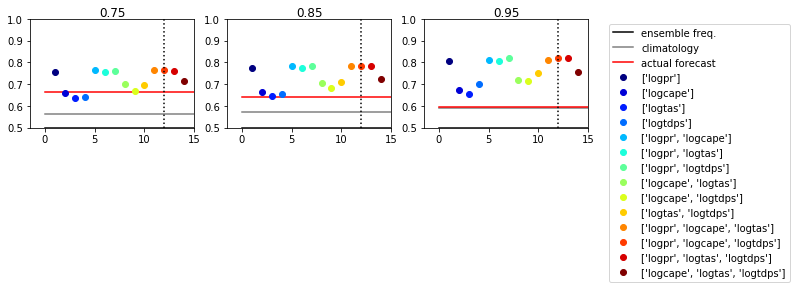

In [90]:
MEDIA = 0

if MEDIA ==1:
    X = Xm*1.
    y = ym*1.
else:
    X = Xall*1.
    y = yall*1.

from itertools import combinations
import random

# set threshold percentile
threshold_perc_list = [0.75,0.85,0.95]
symb_t = 'ox+'
linestyles = [ '-', '--', ':']
symb_t = 'ooo'
linestyles = [ '-', '-', '-']
# set randomness . 1 for random, 0 for split time series
randpick=1
import random
if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    
    picktrain = random.sample(range(X.shape[0]), int(X.shape[0]/2))
    picktrain = np.sort(picktrain)
    picktest = missing_elements(picktrain,0,int(X.shape[0])-1)
    X_trainT = X.iloc[picktrain]
    X_testT = X.iloc[picktest]
    y_trainT = y.iloc[picktrain]
    y_testT = y.iloc[picktest]                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)
elif randpick==-1:
    X_trainT = X[int(X.shape[0]/2):]
    y_trainT = y[int(X.shape[0]/2):].astype(int)
    X_testT = X[0:int(X.shape[0]/2)]
    y_testT = y[0:int(X.shape[0]/2)].astype(int)
    
plt.figure(figsize=(10,2))
for it,threshold_perc in enumerate(threshold_perc_list):
    ax = plt.subplot(1,3,it+1)

    # calculate occurrence and non occurence based on insample quantile so no leaking.
    y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
    y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
    actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)


    # calculate climatology I start by copying the values as they are
    X_trainT['climo_precip'] = y_trainT*1.#X_trainT.apcp_rep*1.
    X_testT['climo_precip'] = y_testT*1.#X_testT.apcp_rep*1.
    # now substitute values per each month
    # GT = X_trainT.groupby(pd.Grouper(freq='M'))
    GT = X_trainT.groupby(X_trainT.index.month)
    X_trainT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)

    # GT = X_testT.groupby(pd.Grouper(freq='M'))
    GT = X_testT.groupby(X_testT.index.month)
    X_testT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)


    if MEDIA ==1:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean(dim=['M','lat','lon']).compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean(dim=['M','lat','lon']).compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
    else:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
#         ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).pr).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']

    if randpick==1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==0:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==-1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]

    REAL = y_testT
    # Generate empty dataframe to put the reference values which I will use for the randomwalk plots
    # this needs to be the TEST segment of the data


    # all combinations of all models
    v1 = ['const']
    # varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
    # varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
    varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
    l1 = list(combinations(varnamesall,1))
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = l1+l2+l3
    ROCAUC = 0.
    ROCplace = 0.
    ROCAUCpar = list()
    colors_lines = plt.cm.jet(np.linspace(0,1,len(lall)))

    Prediction_test_rw = X_testT[['ens_freq']]*1.
    Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
    Prediction_test_rw['actual_forecast'] = actual_forecast*1

    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['ens_freq'].values)], Prediction_test_rw['ens_freq'].values[np.isfinite(Prediction_test_rw['ens_freq'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='black',label='ensemble freq.')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ax.set_title(threshold_perc,horizontalalignment='center',
           verticalalignment='center',)
    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['climo_only'].values)], Prediction_test_rw['climo_only'].values[np.isfinite(Prediction_test_rw['climo_only'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='grey',label = 'climatology')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['actual_forecast'].values)], 
                            Prediction_test_rw['actual_forecast'].values[np.isfinite(Prediction_test_rw['actual_forecast'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='red',label='actual forecast')

    flagpr=0
    for ic,iname in enumerate(lall):
#         print(iname)
        v2=v1+list(iname)
        X_train = X_trainT[v2]
        X_test = X_testT[v2]
        logit_model=sm.Logit(y_trainT,X_train)
    #     model = LogisticRegression(C=1e8)
        if (iname!=('logpr','pr'))&(iname!=('logcape','cape'))&(iname!=('logtas','tas')):
            try:
                result1=logit_model.fit(disp=0,maxiter=100)
                predictions = result1.predict(X_test)
                ROCAUC1 = roc_auc_score(y_testT[np.isfinite(predictions.values)], predictions.values[np.isfinite(predictions.values)])
                ax.plot(ic+1,ROCAUC1,symb_t[it],color=colors_lines[ic],label=v2[1:])
                if ROCAUC1>ROCAUC:
                    ROCAUC=ROCAUC1*1.
                    ROCAUCpar = list(v2)
                    ROCplace=ic+1


            except:
                print('error')
    if it==2:
        ax.legend( bbox_to_anchor=(1.1, 1), loc='upper left')
    ax.set_ylim((0.5,1))
    ax.set_xlim((-1.5,15))
    ax.plot([ROCplace,ROCplace],[0.5,1],'k:')
    

In [ ]:
MEDIA = 0

if MEDIA ==1:
    X = Xm*1.
    y = ym*1.
else:
    X = Xall*1.
    y = yall*1.

from itertools import combinations
import random

# set threshold percentile
threshold_perc_list = [0.75,0.85,0.95]
symb_t = 'ox+'
linestyles = [ '-', '--', ':']
symb_t = 'ooo'
linestyles = [ '-', '-', '-']
# set randomness . 1 for random, 0 for split time series
randpick=1
import random
if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    
    picktrain = random.sample(range(X.shape[0]), int(X.shape[0]/2))
    picktrain = np.sort(picktrain)
    picktest = missing_elements(picktrain,0,int(X.shape[0])-1)
    X_trainT = X.iloc[picktrain]
    X_testT = X.iloc[picktest]
    y_trainT = y.iloc[picktrain]
    y_testT = y.iloc[picktest]                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)
elif randpick==-1:
    X_trainT = X[int(X.shape[0]/2):]
    y_trainT = y[int(X.shape[0]/2):].astype(int)
    X_testT = X[0:int(X.shape[0]/2)]
    y_testT = y[0:int(X.shape[0]/2)].astype(int)
    
plt.figure(figsize=(10,2))
for it,threshold_perc in enumerate(threshold_perc_list):
    ax = plt.subplot(1,3,it+1)

    # calculate occurrence and non occurence based on insample quantile so no leaking.
    y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
    y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
    actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)


    # calculate climatology I start by copying the values as they are
    X_trainT['climo_precip'] = X_trainT.apcp_rep*1.
    X_testT['climo_precip'] = X_testT.apcp_rep*1.
    # now substitute values per each month
    GT = X_trainT.groupby(pd.Grouper(freq='M'))
    X_trainT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)
    GT = X_testT.groupby(pd.Grouper(freq='M'))
    X_testT['climo_precip'] = GT.apcp_rep.transform(np.nanmean)


    if MEDIA ==1:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean(dim=['M','lat','lon']).compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
    else:
        # calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
        ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
        df_merged_M01 = ds_merged_M01.to_dataframe()
        df_merged_M01 = df_merged_M01.reset_index()
        df_merged_M01.index.names = ['orig_rows']
        df_merged_M01.reset_index(inplace=True)
        df_merged_M01.set_index('T', inplace=True)
        ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']

    if randpick==1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==0:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]
    elif randpick==-1:
        X_trainT['ens_freq'] = ens_freq.iloc[X_trainT.orig_rows.values]
        X_testT['ens_freq'] = ens_freq.iloc[X_testT.orig_rows.values]

    REAL = y_testT
    # Generate empty dataframe to put the reference values which I will use for the randomwalk plots
    # this needs to be the TEST segment of the data


    # all combinations of all models
    v1 = ['const']
    # varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
    # varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
    varnamesall = ['logpr', 'logcape', 'logtas', 'logtdps']
    l1 = list(combinations(varnamesall,1))
    l2 = list(combinations(varnamesall,2))
    l3 = list(combinations(varnamesall,3))
    lall = l1+l2+l3
    ROCAUC = 0.
    ROCAUCpar = list()
    colors_lines = plt.cm.jet(np.linspace(0,1,len(lall)))

    Prediction_test_rw = X_testT[['ens_freq']]*1.
    Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
    Prediction_test_rw['actual_forecast'] = actual_forecast*1

    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['ens_freq'].values)], Prediction_test_rw['ens_freq'].values[np.isfinite(Prediction_test_rw['ens_freq'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='black',label='ensemble freq.')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ax.set_title(threshold_perc,horizontalalignment='center',
           verticalalignment='center',)
    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['climo_only'].values)], Prediction_test_rw['climo_only'].values[np.isfinite(Prediction_test_rw['climo_only'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='grey',label = 'climatology')
#     ax.text(-0.8,ROCAUC1,threshold_perc,horizontalalignment='center',
#            verticalalignment='center',)
    ROCAUC1 = roc_auc_score(y_testT[np.isfinite(Prediction_test_rw['actual_forecast'].values)], 
                            Prediction_test_rw['actual_forecast'].values[np.isfinite(Prediction_test_rw['actual_forecast'].values)])
    ax.plot([0,15],[ROCAUC1,ROCAUC1],linestyles[it],color='red',label='actual forecast')

    flagpr=0
    for ic,iname in enumerate(lall):
#         print(iname)
        v2=v1+list(iname)
        X_train = X_trainT[v2]
        X_test = X_testT[v2]
        logit_model=sm.Logit(y_trainT,X_train)
    #     model = LogisticRegression(C=1e8)
        if (iname!=('logpr','pr'))&(iname!=('logcape','cape'))&(iname!=('logtas','tas')):
            try:
                result1=logit_model.fit(disp=0,maxiter=100)
                predictions = result1.predict(X_test)
                ROCAUC1 = roc_auc_score(y_testT[np.isfinite(predictions.values)], predictions.values[np.isfinite(predictions.values)])
                ax.plot(ic+1,ROCAUC1,symb_t[it],color=colors_lines[ic],label=v2[1:])
                if ROCAUC1>ROCAUC:
                    ROCAUC=ROCAUC1*1.
                    ROCAUCpar = list(v2)


            except:
                print('error')
    if it==2:
        ax.legend( bbox_to_anchor=(1.1, 0.5), loc='center left')
    ax.set_ylim((0.5,1))
    ax.set_xlim((-1.5,15))

In [76]:
from itertools import combinations
import random

# set threshold percentile
threshold_perc = 0.85

randpick=1
   
coefvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
aucvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))

for ilat, latx in enumerate(np.arange(32, 43)):
    for ilon, lonx in enumerate(np.arange(257, 271)):
        df_temp = df_merged[(df_merged.lat==latx)&(df_merged.lon==lonx)]#.dropna()
        
        Xallb = df_temp[['orig_rows','apcp_rep','pr','tas','tdps','cape','logpr','logcape','logtas','logtdps']]
        yallb = df_temp.loc[:, df_temp.columns == 'y']
        Xallb['const']=1
        print(Xallb.shape)
        if randpick==1:
#             if (ilat==0)&(ilon==0):
            picktrain = random.sample(range(Xallb.shape[0]), int(Xallb.shape[0]/2))
            picktrain = np.sort(picktrain)
            picktest = missing_elements(picktrain,0,int(Xallb.shape[0])-1)
            X_trainT = Xallb.iloc[picktrain]
            X_testT = Xallb.iloc[picktest]
            y_trainT = yallb.iloc[picktrain]
            y_testT = yallb.iloc[picktest]                                  

        #     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
        elif randpick==0:
            X_trainT = Xallb[0:int(Xallb.shape[0]/2)]
            y_trainT = yallb[0:int(Xallb.shape[0]/2)].astype(int)
            X_testT = Xallb[int(Xallb.shape[0]/2):]
            y_testT = yallb[int(Xallb.shape[0]/2):].astype(int)
        elif randpick==-1:
            X_trainT = Xallb[int(Xallb.shape[0]/2):]
            y_trainT = yallb[int(Xallb.shape[0]/2):].astype(int)
            X_testT = Xallb[0:int(Xallb.shape[0]/2)]
            y_testT = yallb[0:int(Xallb.shape[0]/2)].astype(int)
        X_trainT=X_trainT.dropna()
        X_testT=X_testT.dropna()
        y_trainT=y_trainT.dropna()
        y_testT=y_testT.dropna()
        # calculate occurrence and non occurence based on insample quantile so no leaking.
        y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
        y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)
        actual_forecast =(X_testT.pr>=X_testT.quantile(threshold_perc).pr).astype(int)       
    #     print(y_trainT.head(10))
#         varname=['const','logpr' ]   
#         varname=['const','logpr','logtdps' ]   
        varname=['const','logpr','logtdps', 'logcape' ]   
        X_train = X_trainT[varname]
        X_test = X_testT[varname]
        logit_model=sm.Logit(y_trainT,X_train)
    #     model = LogisticRegression(C=1e8)
        result1=logit_model.fit(disp=1,maxiter=100)
        predictions = result1.predict(X_test)
        ROCAUC1 = roc_auc_score(y_testT[np.isfinite(predictions.values)], predictions.values[np.isfinite(predictions.values)])
        coefvalues[ilat,ilon]= result1.params[1]
        aucvalues[ilat,ilon]= ROCAUC1



/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(324, 11)
Optimization terminated successfully.
         Current function value: 0.379711
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.391942
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.405098
         Iterations 7
(324, 11)
Optimization terminated successfully.
         Current function value: 0.306870
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.336054
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.320985
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.319246
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.321732
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.322912
         Itera

Optimization terminated successfully.
         Current function value: 0.349731
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.362945
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.368933
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.349664
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.349954
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.293419
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.354727
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.335467
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.369448
         Iterations 8
(3

Optimization terminated successfully.
         Current function value: 0.322616
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.352109
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.290121
         Iterations 9
(324, 11)
Optimization terminated successfully.
         Current function value: 0.388533
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.349333
         Iterations 8
(324, 11)
Optimization terminated successfully.
         Current function value: 0.342483
         Iterations 9


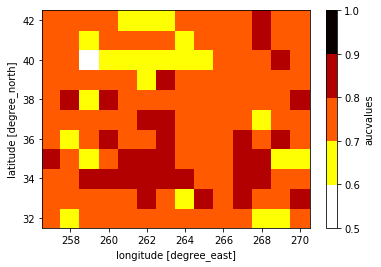

In [77]:
cmap1 = plt.cm.get_cmap('hot_r', 5) 
ds_merged['aucvalues']=(('lat','lon'),aucvalues)

ds_merged.aucvalues.plot(vmax=1, vmin=0.5,
            cmap=cmap1)

# Comparing monthly average prob>0.85 with the one from the forecast

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

0.6468531468531469
0.4254643206256109
0.2993977631201606
0.583502759221609
0.3834710743801653
0.16518275538894095
0.5060034305317324
0.35934819897084047
0.48019235172887564
0.5165847665847666
0.4144641301190822
0.3640875253778479
0.756534090909091
0.36386827458256027
0.39503588516746413
0.7429567237873947
0.5983827493261455
0.6049853372434018
0.5381428223251279
0.40163242330425
0.6404428904428904
0.15568181818181817
0.5294298921417566
0.33900881726968685
0.5326310968628348
0.6157804459691252
0.49283835135925164
0.34860606060606064
0.6002886002886003
0.42486562280906753
0.6917613636363636
0.5168744299179082
0.6451762523191094
0.44368600682593856
0.5056446821152704
0.5614156835530881
0.45910515816471925
0.4977567886658795
0.45698051948051943
0.5746857643963754
0.21248630887185105
0.4249073810202336
0.4144945963127781
0.6067937438905181
0.5351048951048952
0.5454545454545454
0.44810307802433785
0.7247735082786629
0.5217932752179327
0.6136363636363636
0.6968673218673218
0.5649531526968853
0

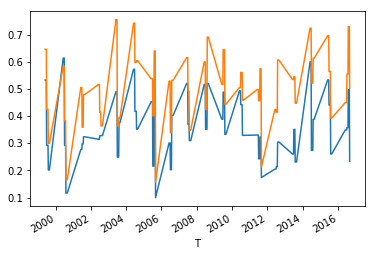

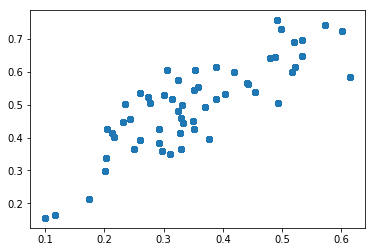

In [86]:
X_testT.climo_precip.plot()
X_testT['ens_freq_Mon_mean'] = X_testT['climo_precip']*1.
for k, v in  X_testT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
    media = np.nanmean( X_testT['ens_freq'].iloc[v].values)
    print(media)
#     media = np.nanmean( y_trainT.iloc[v].values)
    X_testT['ens_freq_Mon_mean'].iloc[v] =media
    del media

X_testT.ens_freq_Mon_mean.plot()
plt.figure()
plt.plot(X_testT.climo_precip,X_testT.ens_freq_Mon_mean,'o')


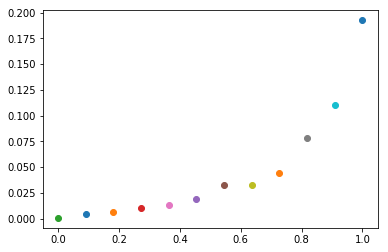

In [90]:
for iu in X_trainT.ens_freq.unique():
    plt.plot(iu,y_trainT[X_trainT.ens_freq==iu].mean(),'o')

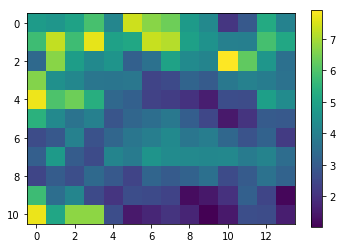

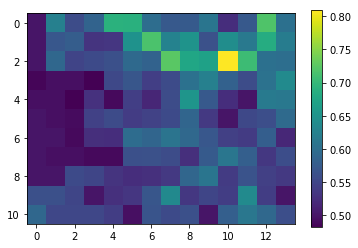

In [333]:
plt.figure()
plt.imshow(coefvalues)
plt.colorbar()
plt.figure()
plt.imshow(aucvalues)
plt.colorbar()

In [491]:
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    
#     if features_null!=None:
#         features_null = np.array(features_null)
        
#         if features_null.shape[1] >= features_alternate.shape[1]:
#             raise ValueError, "Alternate features must have more features than null features"
        
    lr_model.fit(features_null, labels)
    print(lr_model.coef_)
    null_prob = lr_model.predict_proba(features_null)[:, 1]
    df = features_alternate.shape[1] - features_null.shape[1]
    print(df)
#     else:
#         null_prob = sum(labels) / float(labels.shape[0]) * \
#                     np.ones(labels.shape)
#         df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)
    print(lr_model.coef_)
    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)
    print(alt_log_likelihood,null_log_likelihood)
    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)

    return p_value

In [462]:
def plot_pvalues( p_values, title):
    log_p_values = np.log10(p_values)
    plt.clf()
    plt.boxplot(x=log_p_values)
    plt.xlabel("Variable", fontsize=16)
    plt.ylabel("P-Value (log10)", fontsize=16)
    plt.title(title, fontsize=18)
#     plt.savefig(flname, DPI=200)


In [ ]:
for i in xrange(len(CORR_PROBS)):
    # force into Nx1 matrix
    column = features[:, i].reshape(-1, 1)
    p_value = likelihood_ratio_test(column,
                                    labels,
                                    model)
    feature_log_p_values[j, i] = p_value
    
plot_pvalues(feature_log_p_values,
                 "")


In [104]:
# varname=['const','pr','tdps']
# X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.7, random_state=0)
# y_trainT = y_trainT.astype(int)
# y_testT = y_testT.astype(int)
# X_train = X_trainT[varname]
# X_test = X_testT[varname]
# logit_model=sm.Logit(y_trainT,X_train)
# result1=logit_model.fit()
# # print(result1.summary2())
# predictions = result1.predict(X_test)
# predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# print(classification_report(y_testT, predictions_nominal, digits=3))
# print(metrics.confusion_matrix(y_testT, predictions_nominal))


# where_1 = y_trainT[y_trainT==1]
# where_0 = y_trainT[y_trainT==0]
# for ir in range(0,10):
#     NN = y_trainT[y_trainT==1].count()
#     print(NN.values)
#     which_0 = where_0.dropna().sample(NN.values*2).index    
#     XX0 = X_train.loc[which_0]
#     XX1 = X_train.loc[where_1.dropna().index]
#     YY0 = where_0.dropna().loc[which_0]
#     YY1 = where_1.dropna()
#     logit_model=sm.Logit(pd.concat([YY1,YY0]),pd.concat([XX1,XX0]))
#     result1=logit_model.fit()
# #     print(result1.summary2())
#     predictions = result1.predict(X_test)
#     predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
#     print(classification_report(y_testT, predictions_nominal, digits=3))
#     print(metrics.confusion_matrix(y_testT, predictions_nominal))


['pr', 'tas', 'cape']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.15968929e+00 -7.12871208e-03  8.05000073e-04]]
[0.0293331]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.4984
0.5460477092658165


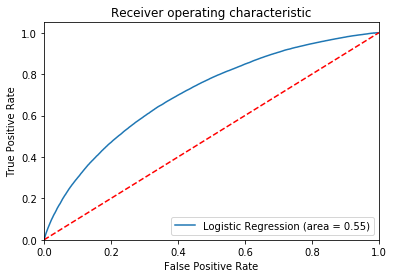

['pr', 'tas']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.34034886 -0.02272774]]
[5.17836996]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.5053
0.540276782365082


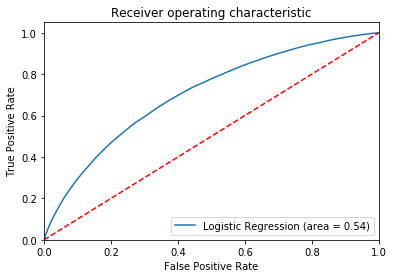

0.0


In [459]:
varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregA = logreg
X_testA = X_test
alt_log_likelihood = -log_loss(y_test, logregA.predict_proba(X_test), normalize=False)

varname=['pr','tas'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregB = logreg
X_testB = X_test
null_log_likelihood = -log_loss(y_test, logregB.predict_proba(X_test), normalize=False)

G = 2 * (alt_log_likelihood - null_log_likelihood)
df = X_testA.shape[1] - X_testB.shape[1]
p_value = chi2.sf(G, df)
print(p_value)
